In [2]:
from pixell import reproject, enmap, utils, enplot
import numpy as np
# define a plotting function
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs))
import healpy as hp
import coop_post_processing as cpp
import coop_setup_funcs as csf
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import wcs as astwcs
import sys
# autoreload
# instert path
%load_ext autoreload
%autoreload 2
sys.path.append("..")
import stacking_functions as sf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mymap = enmap.read_map("/mnt/raid-cita/mlokken/data/many_diagonal_lines_multi_direction_map.fits")


In [5]:
rot_angle,ra,dec, parityx, parityy, peakid = cpp.get_peakinfo("/home/mlokken/oriented_stacking/oriented_superclustering/testing/testing_data/many_diag_line_multi_pks_with_orientation_asym.fits")


FORMAT  =HEALPIX                                                                 [astropy.io.fits.card]
MAP     =/mnt/raid-cita/mlokken/data/many_diagonal_lines_multi_direction_map_hpx [astropy.io.fits.card]
FWHM    =0.                                                                      [astropy.io.fits.card]
OUTPUT  =/home/mlokken/oriented_stacking/oriented_superclustering/testing/testin [astropy.io.fits.card]
EXTERNAL=/home/mlokken/oriented_stacking/oriented_superclustering/testing/testin [astropy.io.fits.card]
NU_MIN  =-1.e30                                                                  [astropy.io.fits.card]
NU_MAX  =1.e30                                                                   [astropy.io.fits.card]
FWHM_NU =0.                                                                      [astropy.io.fits.card]
E_MIN   =0                                                                       [astropy.io.fits.card]
E_MAX   =1.e30                                                  

In [7]:
# make a Chunk object
Chunk = sf.Chunk(ra, dec, rot_angle, parityx, parityy)
orient = 'asymmetric'
cutout_size_deg = 10
cutout_resolution_deg = 0.5


# Stack
stack = sf.stackChunk(Chunk, mymap, cutout_size_deg, cutout_resolution_deg, orient)
# try to use multiple?




x_lrg shape is (43,) y_lrg shape is (43,) thumbnail shape is (43, 43)
- analyze object 0


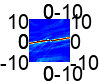

0.17279243485515913 6.101936896986616 -0.1786068004610003 0.18691947411690304


In [82]:
eshow(stack, ticks=10)
# get min, max ra, dec from stack
ra_min = enmap.pix2sky(stack.shape, stack.wcs, [0,0])[1]
ra_max = enmap.pix2sky(stack.shape, stack.wcs, [0,stack.shape[1]])[1]
dec_min = enmap.pix2sky(stack.shape, stack.wcs, [0,0])[0]
dec_max = enmap.pix2sky(stack.shape, stack.wcs, [stack.shape[0],0])[0]
print(ra_min, ra_max, dec_min, dec_max)


In [ ]:
thumb_shape, thumb_wcs  = enmap.thumbnail_geometry(r=cutout_size_deg*utils.degree, res=cutout_resolution_deg*utils.degree)


In [ ]:
thumb_shape

In [ ]:
thumb_base = reproject.thumbnails(imap, coords=np.deg2rad([0,0]).T, res=cutout_resolution_deg*utils.degree, r=cutout_size_deg*utils.degree, method="spline", order=1)
thumb_shape, thumb_wcs = thumb_base.shape, thumb_base.wcs

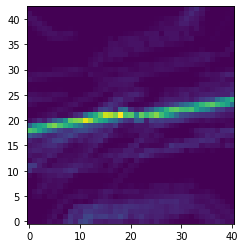

In [83]:
plt.imshow(stack, origin='lower')

In [22]:
ls -lrth /mnt/raid-cita/mlokken/data/many_diagonal_lines_multi_direction_map.fits

-rw-r--r-- 1 mlokken cita 35M Apr  7 10:39 /mnt/raid-cita/mlokken/data/many_diagonal_lines_multi_direction_map.fits


FWHM_ORI=200                                                                     [astropy.io.fits.card]


In [60]:
# make a Chunk object
Chunk = sf.Chunk(ra, dec, rot_angle, parityx, parityy)
orient = 'asymmetric'
cutout_size_deg = 5
cutout_resolution_deg = 0.25


# Stack
stack = sf.stackChunk(Chunk, diaglines2, cutout_size_deg, cutout_resolution_deg, orient)

x_lrg shape is (45,) y_lrg shape is (45,) thumbnail shape is (45, 45)
- analyze object 0
